# Title

###  EODS-Project1-Group9

Description

## 1.Set Environment and Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
news = pd.read_csv("../data/OnlineNewsPopularity.csv")
news.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
# delete space in column names
colnames = news.columns.to_list()
for index, value in enumerate(colnames):
    colnames[index] = value.replace(" ","")
news.columns = colnames
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12  num_keywords                   39644 non-null 

## Data Cleaning

In [4]:
news = news.iloc[:, 2:]

In [5]:
# distribution plot

to_plot1 = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 
           'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 
           'num_videos', 'average_token_length', 'num_keywords']
to_plot2 = ['kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 
            'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg']
to_plot3 = ['self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 
            'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04']
to_plot4 = ['global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words']
to_plot5 = ['avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 
            'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 
            'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 
            'abs_title_sentiment_polarity']

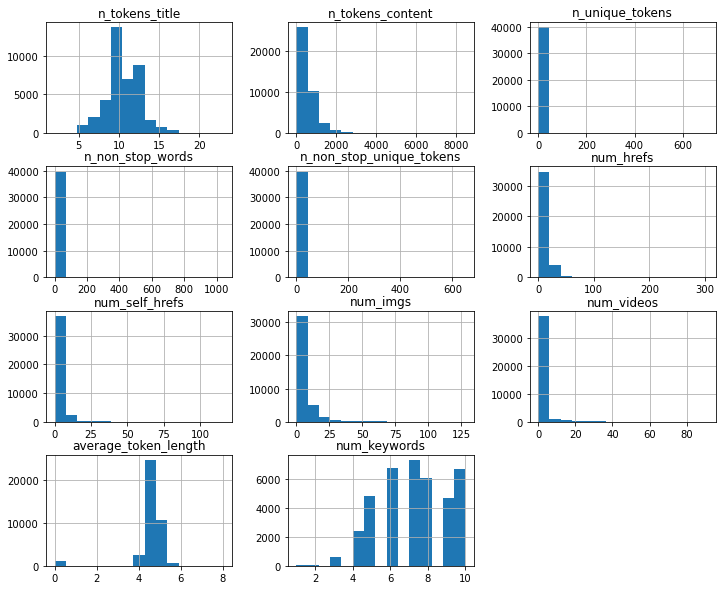

In [6]:
news[to_plot1].hist(bins = 15, figsize = (12, 10))
plt.show()

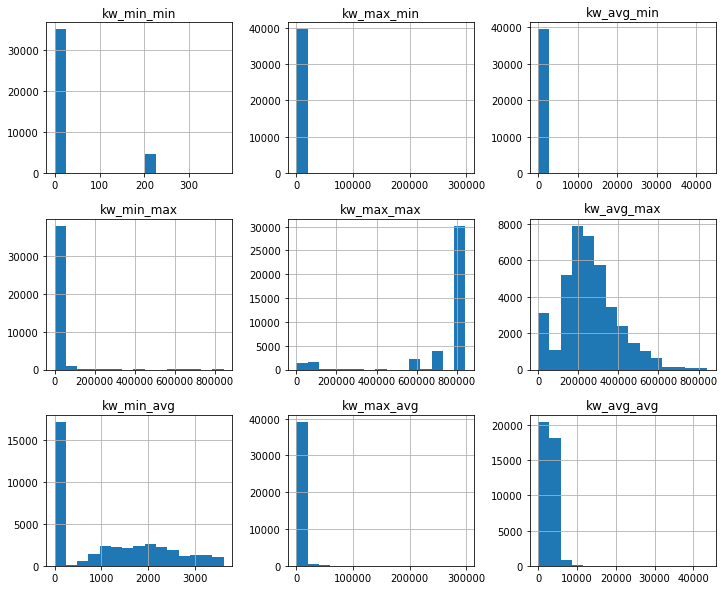

In [7]:
news[to_plot2].hist(bins = 15, figsize = (12, 10))
plt.show()

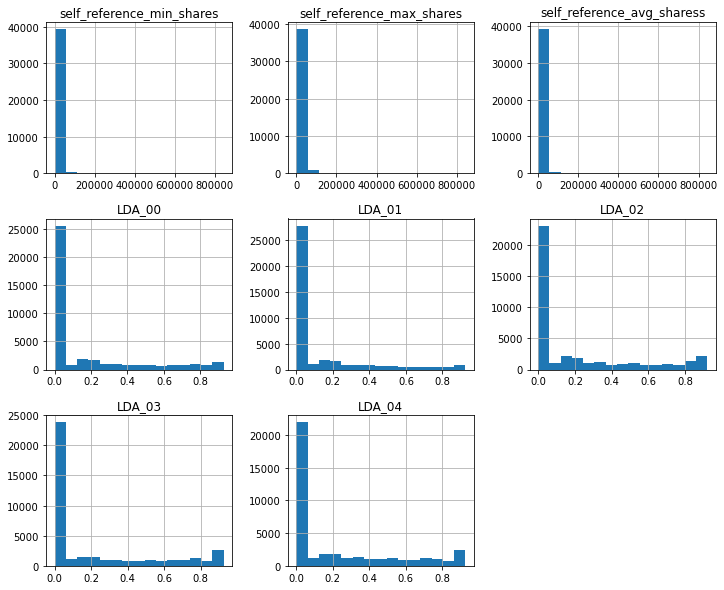

In [8]:
news[to_plot3].hist(bins = 15, figsize = (12, 10))
plt.show()

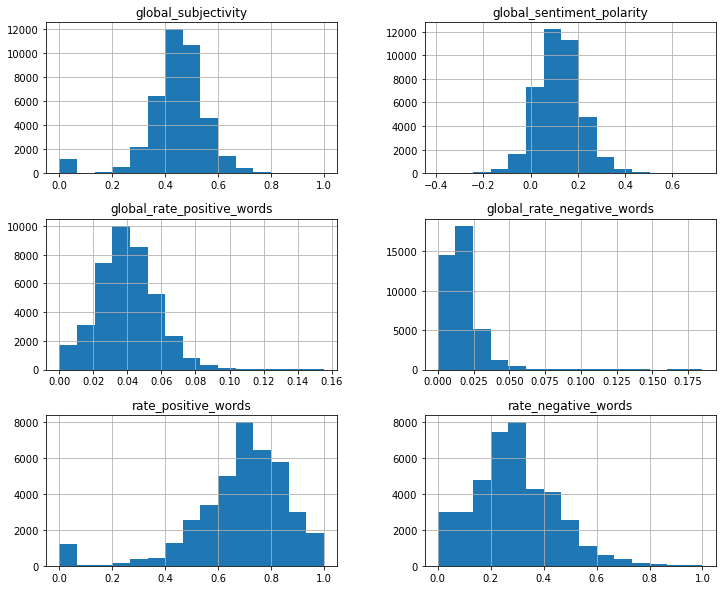

In [9]:
news[to_plot4].hist(bins = 15, figsize = (12, 10))
plt.show()

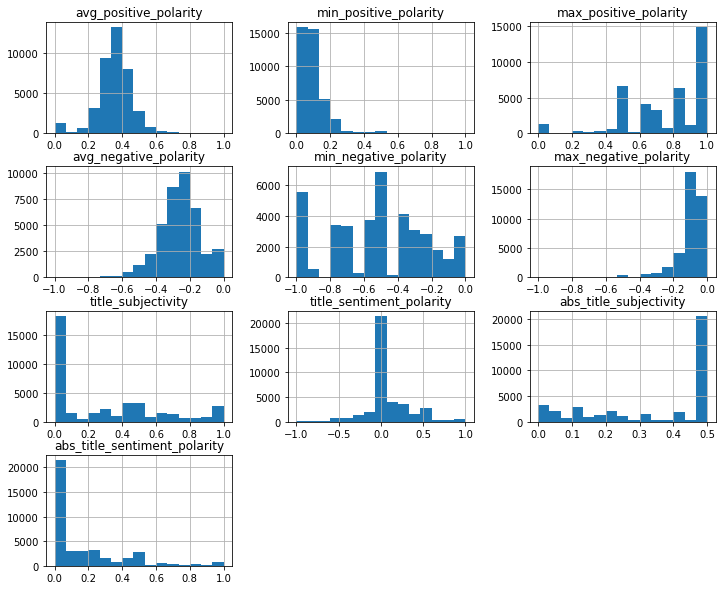

In [10]:
news[to_plot5].hist(bins = 15, figsize = (12, 10))
plt.show()

In [18]:
# delete outliers
numerical = to_plot1 + to_plot2 + to_plot3 + to_plot4 + to_plot5 + ["shares"]

for column in numerical:
    Q1 = np.percentile(news[column], 25)
    Q3 = np.percentile(news[column], 75)
    IQR = Q3 - Q1
    
    outlier_step = 1.5 * IQR
    news_clean = news[(news[column] >= Q1 - outlier_step) & (news[column] <= Q3 + outlier_step)]

In [19]:
news_clean.shape

(35103, 59)

In [20]:
# correlation
corr = news_clean[numerical].corr()
corr["shares"].sort_values(ascending=False)

shares                          1.000000
kw_avg_avg                      0.147678
kw_min_avg                      0.089510
LDA_04                          0.086734
num_hrefs                       0.077652
LDA_00                          0.075626
num_keywords                    0.065535
global_rate_positive_words      0.063263
global_sentiment_polarity       0.063261
kw_max_avg                      0.063157
global_subjectivity             0.058290
self_reference_avg_sharess      0.057195
num_imgs                        0.055927
self_reference_max_shares       0.054805
n_tokens_content                0.047821
title_sentiment_polarity        0.045289
rate_positive_words             0.044742
self_reference_min_shares       0.044588
num_self_hrefs                  0.043162
kw_min_min                      0.039893
LDA_03                          0.039276
max_positive_polarity           0.033220
kw_avg_min                      0.031629
abs_title_sentiment_polarity    0.029515
title_subjectivi